# Computer Vision Labsheet 1

## Geomtric Transformation

### Name: Aniketh Vijesh
### Roll No: AM.EN.U4AIE222009

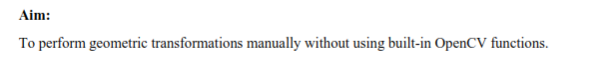

In [2]:
import os 
import PIL
import numpy as np
import matplotlib.pyplot as plt

## To Do:

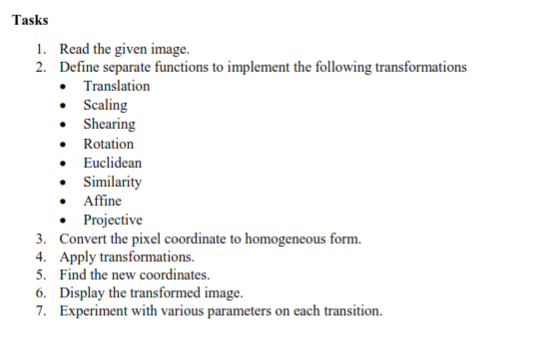

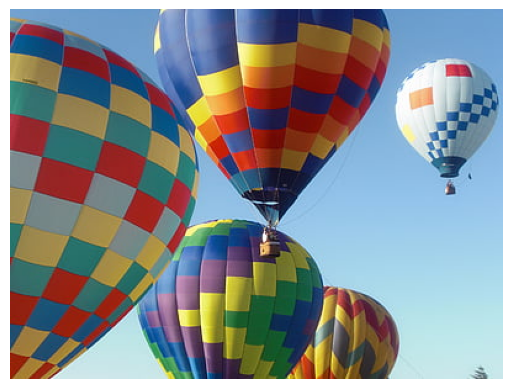

In [5]:
image_path = os.path.join('./Lab 1.jpg')
image = np.array(PIL.Image.open(image_path))
plt.imshow(image)
plt.axis('off')
plt.show()


In [7]:
print(image.shape)

(300, 400, 3)


In [31]:
# Defining functions for transformation
def translate(image, tx, ty):
    rows, cols = image.shape[:2]
    image_transformed = np.zeros_like(image)
    
    for i in range(rows):
        for j in range(cols):
            new_i = i+tx
            new_j = j+ty
            if 0 <= new_i < rows and 0 <= new_j < cols:
                image_transformed[new_i, new_j] = image[i,j]
    return image_transformed


def translate_using_matrix(image, tx, ty):
    rows, cols = image.shape[:2]
    tranformation_matrix = np.array([1,0,tx], [0,1,ty], [0,0,1])
    
    

In [34]:
def generate_translate_matrix(tx, ty):
    return np.array([1,0,tx], [0,1,ty], [0,0,1])

def generate_scaling_matrix(sx, sy):
    return np.array([1,0,sx], [0,1,sy], [0,0,1])

def generate_shearing_matrix(shx, shy):
    return np.array([1,0,shx], [0,1,shy], [0,0,1])

def generate_rotation_matrix(theta):
    return np.array([np.cos(theta),-np.sin(theta),0], [np.sin(theta),np.cos(theta),0], [0,0,1])

def generate_euclidean_matrix(tx, ty, theta):
    return np.array([np.cos(theta),-np.sin(theta),tx], [np.sin(theta),np.cos(theta),ty], [0,0,1])

def generate_similarity_matrix(tx, ty, theta, s):
    return np.array([s*np.cos(theta),-s*np.sin(theta),tx], [s*np.sin(theta),s*np.cos(theta),ty], [0,0,1])

def generate_affine_matrix(a11, a12, a21, a22, tx, ty):
    return np.array([a11,a12,tx], [a21,a22,ty], [0,0,1])

def generate_projective_matrix(h11, h12, h13, h21, h22, h23, h31, h32):
    return np.array([h11,h12,h13], [h21,h22,h23], [h31,h32,1])



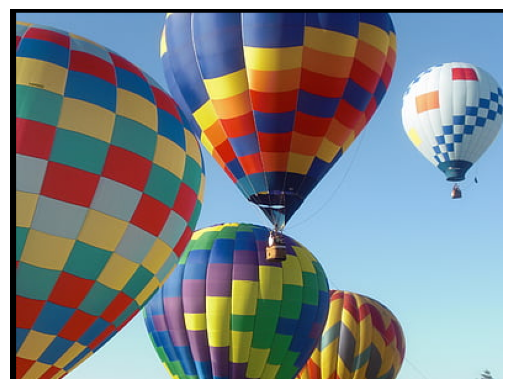

In [35]:
translated_image = translate(image, 3,5)
plt.imshow(translated_image)
plt.axis('off')
plt.show()


In [12]:
print(image.shape[:2])

(300, 400)


In [36]:
def transform_image_with_matrix(image_array, transformation_matrix):
    """
    Apply transformation matrix to an image using matrix multiplication.
    
    Args:
        image_array: Input image as numpy array (H,W,C) or (H,W) 
        transformation_matrix: 3x3 transformation matrix
    Returns:
        transformed_image: Output transformed image as numpy array
    """
    # Get image dimensions
    rows, cols = image_array.shape[:2]
    
    # Create output image of same size
    transformed_image = np.zeros_like(image_array)
    
    # For each pixel in the image
    for i in range(rows):
        for j in range(cols):
            # Create homogeneous coordinates [x,y,1]
            point = np.array([j, i, 1])
            
            # Apply transformation
            new_point = np.dot(transformation_matrix, point)
            
            # Convert back from homogeneous coordinates
            new_j = int(new_point[0] / new_point[2])
            new_i = int(new_point[1] / new_point[2])
            
            # Copy pixel if within bounds
            if 0 <= new_i < rows and 0 <= new_j < cols:
                transformed_image[new_i, new_j] = image_array[i,j]
                
    return transformed_image


In [37]:
transformed_image = transform_image_with_matrix(image, generate_translate_matrix(3,5))
plt.imshow(transformed_image)
plt.axis('off')
plt.show()

TypeError: array() takes from 1 to 2 positional arguments but 3 were given